Importing the necessary libraries

In [1]:
#importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install emoji
!pip install demoji
import emoji
import demoji
import nltk
nltk.download('punkt')
from nltk import FreqDist
from matplotlib.ticker import MaxNLocator

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Elsie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Data Without Emojis

In [2]:
#reading the sentiments dataframe
df = pd.read_csv('Data/sentiments_df.csv')
df.head()

,id,original_text,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,...,pride,realization,relief,remorse,sadness,surprise,neutral,listed_emotions,emotion_count,emojis
0,eew5j0j,That game hurt.,that game hurt,False,0,0,0,0,0,0,...,0,0,0,0,1,0,0,sadness,1,NaN
1,ed2mah1,"You do right, if you don't care then fuck 'em!",you do right if you dont care then fuck em,False,0,0,0,0,0,0,...,0,0,0,0,0,0,1,neutral,1,NaN
2,eeibobj,Man I love reddit.,man i love reddit,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,love,1,NaN
3,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",name was nowhere near them he was by the falcon,False,0,0,0,0,0,0,...,0,0,0,0,0,0,1,neutral,1,NaN
4,eespn2i,Right? Considering it’s such an important docu...,right considering it’s such an important docum...,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,gratitude,1,NaN


In [3]:
#Displaying the datatypes of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207814 entries, 0 to 207813
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    207814 non-null  object
 1   original_text         207814 non-null  object
 2   text                  207806 non-null  object
 3   example_very_unclear  207814 non-null  bool  
 4   admiration            207814 non-null  int64 
 5   amusement             207814 non-null  int64 
 6   anger                 207814 non-null  int64 
 7   annoyance             207814 non-null  int64 
 8   approval              207814 non-null  int64 
 9   caring                207814 non-null  int64 
 10  confusion             207814 non-null  int64 
 11  curiosity             207814 non-null  int64 
 12  desire                207814 non-null  int64 
 13  disappointment        207814 non-null  int64 
 14  disapproval           207814 non-null  int64 
 15  disgust          

In [4]:
#Displaying the rows and columns of the dataframe
df.shape

(207814, 35)

In [5]:
#Displaying the descriptive information of the dataframe
df.describe()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,emotion_count
count,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,...,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000,207814.000000
mean,0.082434,0.044487,0.038900,0.065530,0.084787,0.028867,0.035411,0.046638,0.018367,0.040753,...,0.008710,0.041937,0.006265,0.042273,0.006203,0.012150,0.032519,0.026533,0.266094,1.200732
std,0.275026,0.206175,0.193358,0.247459,0.278566,0.167434,0.184818,0.210862,0.134276,0.197717,...,0.092919,0.200445,0.078905,0.201213,0.078513,0.109557,0.177376,0.160715,0.441915,0.479124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000


In [6]:
#Dropping the example_very_unclear column
df = df[df['example_very_unclear'] != True]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207814 entries, 0 to 207813
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    207814 non-null  object
 1   original_text         207814 non-null  object
 2   text                  207806 non-null  object
 3   example_very_unclear  207814 non-null  bool  
 4   admiration            207814 non-null  int64 
 5   amusement             207814 non-null  int64 
 6   anger                 207814 non-null  int64 
 7   annoyance             207814 non-null  int64 
 8   approval              207814 non-null  int64 
 9   caring                207814 non-null  int64 
 10  confusion             207814 non-null  int64 
 11  curiosity             207814 non-null  int64 
 12  desire                207814 non-null  int64 
 13  disappointment        207814 non-null  int64 
 14  disapproval           207814 non-null  int64 
 15  disgust          

In [8]:
#splitting the dataframes into text and labels
#Labels Dataframe
labels_df = df.iloc[:,4:-3]
labels_df

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207810,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
207811,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207812,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Creating a column for the labels
# Define the mapping of emotions to categories
emotion_to_category = {
    'admiration': 'positive',
    'amusement': 'positive',
    'approval': 'positive',
    'caring': 'positive',
    'curiosity': 'positive',
    'excitement': 'positive',
    'gratitude': 'positive',
    'joy': 'positive',
    'love': 'positive',
    'optimism': 'positive',
    'relief': 'positive',
    'surprise': 'positive',
    'sadness': 'negative',
    'pride': 'negative',
    'fear': 'negative',
    'embarrassment': 'negative',
    'disapproval': 'negative',
    'disappointment': 'negative',
    'confusion': 'negative',
    'annoyance': 'negative',
    'anger': 'negative',
    'nervousness': 'negative',
    'desire': 'negative',
    'remorse': 'ambiguous',
    'realization': 'ambiguous',
    'grief': 'ambiguous',
    'disgust': 'ambiguous',
    'neutral': 'neutral'
}
# Assuming your labels are stored in a DataFrame called 'labels_df'
emotions_columns = labels_df.columns[0:]  # Assuming emotions start from column 1
labels_df['category'] = labels_df[emotions_columns].apply(lambda row: emotion_to_category.get(row.idxmax(), 'unknown'), axis=1)
# Drop the individual emotion columns
labels_df.drop(emotions_columns, axis=1, inplace=True)

In [9]:
#Text Dataframe
text_df = df[['original_text', 'text', 'emojis']]
text_df

,original_text,text,emojis
0,That game hurt.,that game hurt,NaN
1,"You do right, if you don't care then fuck 'em!",you do right if you dont care then fuck em,NaN
2,Man I love reddit.,man i love reddit,NaN
3,"[NAME] was nowhere near them, he was by the Fa...",name was nowhere near them he was by the falcon,NaN
4,Right? Considering it’s such an important docu...,right considering it’s such an important docum...,NaN
...,...,...,...
207809,"Well, I'm glad you're out of all that now. How...",well im glad youre out of all that now how awf...,NaN
207810,Everyone likes [NAME].,everyone likes name,NaN
207811,Well when you’ve imported about a gazillion of...,well when you’ve imported about a gazillion of...,NaN
207812,That looks amazing,that looks amazing,NaN


## Tokenization

In [11]:
# Assuming you have already loaded your data into a DataFrame called text_df
# Download necessary NLTK resources (only required for the first time)
nltk.download('punkt')
# Convert the 'text' column to strings
text_df['text'] = text_df['text'].astype(str)
# Tokenize the text in the 'text' column
text_df['tokenized_text'] = text_df['text'].apply(word_tokenize)
# Display the DataFrame with the tokenized text
print(text_df.head())
# Print the updated DataFrame
print(text_df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Elsie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                       original_text  \
0                                    That game hurt.   
1     You do right, if you don't care then fuck 'em!   
2                                 Man I love reddit.   
3  [NAME] was nowhere near them, he was by the Fa...   
4  Right? Considering it’s such an important docu...   

                                                text emojis  \
0                                     that game hurt    NaN   
1         you do right if you dont care then fuck em    NaN   
2                                  man i love reddit    NaN   
3   name was nowhere near them he was by the falcon     NaN   
4  right considering it’s such an important docum...    NaN   

                                      tokenized_text  
0                                 [that, game, hurt]  
1  [you, do, right, if, you, dont, care, then, fu...  
2                             [man, i, love, reddit]  
3  [name, was, nowhere, near, them, he, was, by, ...  
4  [right

In [12]:
#Visualizing the most common words using matplotlib
def most_frequent_words(freq_dist, title):

    # Extract data for plotting
    top_30 = list(zip(*freq_dist.most_common(30)))
    tokens = top_30[0]
    counts = top_30[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

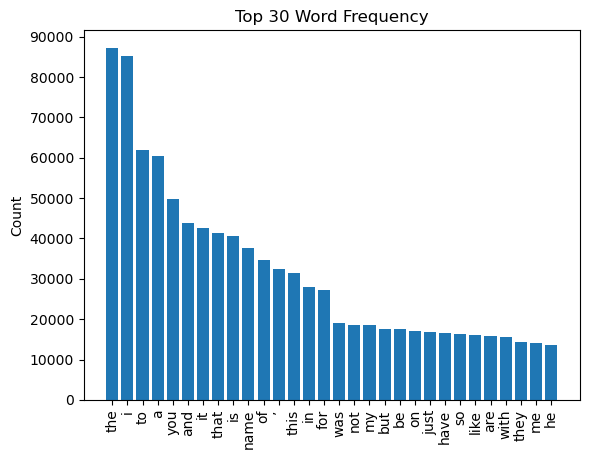

In [13]:
#Visualising the entire dataset

sample_freq_dist = FreqDist(text_df["tokenized_text"].explode())
most_frequent_words(sample_freq_dist, "Top 30 Word Frequency")

In [14]:
#Identifying the bigrams
#from nltk.util import ngrams

# Generate bigrams from tokenized text
#bigrams = [bigram for sentence in text_df['tokenized_text'] for bigram in ngrams(sentence, 2)]

# Print the resulting bigrams
#for bigram in bigrams:
   # print(bigram)

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elsie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Removal of stopwords

In [16]:
import nltk
from nltk.corpus import stopwords

# Get the list of stopwords
stopword_list = set(stopwords.words('english'))

# Remove stopwords from the 'tokenized_text' column
text_df['without_stopwords'] = text_df['tokenized_text'].apply(lambda tokens: [token for token in tokens if token.lower() not in stopword_list])

# Print the updated DataFrame
print(text_df.head())

                                       original_text  \
0                                    That game hurt.   
1     You do right, if you don't care then fuck 'em!   
2                                 Man I love reddit.   
3  [NAME] was nowhere near them, he was by the Fa...   
4  Right? Considering it’s such an important docu...   

                                                text emojis  \
0                                     that game hurt    NaN   
1         you do right if you dont care then fuck em    NaN   
2                                  man i love reddit    NaN   
3   name was nowhere near them he was by the falcon     NaN   
4  right considering it’s such an important docum...    NaN   

                                      tokenized_text  \
0                                 [that, game, hurt]   
1  [you, do, right, if, you, dont, care, then, fu...   
2                             [man, i, love, reddit]   
3  [name, was, nowhere, near, them, he, was, by, ...   
4  [

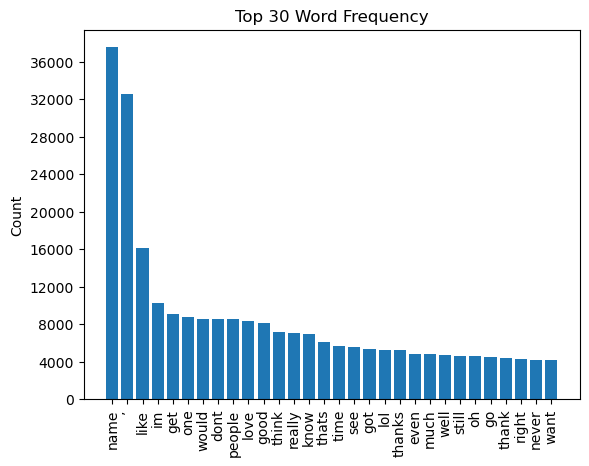

In [17]:
#Visualising the entire dataset after removal of stop words

sample_freq_dist = FreqDist(text_df["without_stopwords"].explode())
most_frequent_words(sample_freq_dist, "Top 30 Word Frequency")

### Stemming without emojis

In [18]:
from nltk.stem import PorterStemmer

#Creating an instance of the PorterStemmer
stemmer = PorterStemmer()

#Function to apply Stemming
def stem_word(word):
  return stemmer.stem(word)

#Applying stemming to the 'without_stopwords' column
text_df['stemmed_text'] = text_df['without_stopwords'].apply(lambda x: [stem_word(word) for word in x])

print(text_df)


                                            original_text  \
0                                         That game hurt.   
1          You do right, if you don't care then fuck 'em!   
2                                      Man I love reddit.   
3       [NAME] was nowhere near them, he was by the Fa...   
4       Right? Considering it’s such an important docu...   
...                                                   ...   
207809  Well, I'm glad you're out of all that now. How...   
207810                             Everyone likes [NAME].   
207811  Well when you’ve imported about a gazillion of...   
207812                                 That looks amazing   
207813  The FDA has plenty to criticize. But like here...   

                                                     text emojis  \
0                                          that game hurt    NaN   
1              you do right if you dont care then fuck em    NaN   
2                                       man i love reddit    Na

In [19]:
#creating a dataframe of stemmed data
stemmed_df = text_df[['stemmed_text']]
stemmed_df.head()

,stemmed_text
0,"[game, hurt]"
1,"[right, dont, care, fuck, em]"
2,"[man, love, reddit]"
3,"[name, nowher, near, falcon]"
4,"[right, consid, ’, import, document, know, dam..."


In [20]:
stemmed_df.shape

(207814, 1)

Analysing the scores for the stemmed text

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
# Split the DataFrame into train and test sets
X = text_df['stemmed_text'].apply(lambda x: ' '.join(x))
y = labels_df['encoded_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a CountVectorizer to convert text into numeric features
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectors, y_train)
# Predict labels on the test set
y_pred = classifier.predict(X_test_vectors)
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
Accuracy = accuracy_score(y_test,y_pred)
# Print the evaluation scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy Score:", Accuracy)

Precision: 0.47937240446568297
Recall: 0.43482289199003943
F1 Score: 0.4398858959554106
Accuracy Score: 0.5546760339725236


### Lematization Without Emojis

In [22]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
# Assuming your DataFrame is called 'text_df' and the column to lemmatize is 'without_stopwords'
# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# Function to apply lemmatization to a list of words
def apply_lemmatization(word_list):
    lemmatized_text = ' '.join(['[' + lemmatizer.lemmatize(word) + ']' for word in word_list])
    return lemmatized_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Elsie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
# Create a new column 'lemmatized_column' with the lemmatized text
text_df['lemmatized_column'] = text_df['without_stopwords'].apply(apply_lemmatization)

# Print the updated DataFrame
print(text_df.head())

                                       original_text  \
0                                    That game hurt.   
1     You do right, if you don't care then fuck 'em!   
2                                 Man I love reddit.   
3  [NAME] was nowhere near them, he was by the Fa...   
4  Right? Considering it’s such an important docu...   

                                                text emojis  \
0                                     that game hurt    NaN   
1         you do right if you dont care then fuck em    NaN   
2                                  man i love reddit    NaN   
3   name was nowhere near them he was by the falcon     NaN   
4  right considering it’s such an important docum...    NaN   

                                      tokenized_text  \
0                                 [that, game, hurt]   
1  [you, do, right, if, you, dont, care, then, fu...   
2                             [man, i, love, reddit]   
3  [name, was, nowhere, near, them, he, was, by, ...   
4  [

In [25]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
labels_df['encoded_column'] = label_encoder.fit_transform(labels_df['category'])
labels_df.head(10)

,category,encoded_column
0,negative,1
1,neutral,2
2,positive,3
3,neutral,2
4,positive,3
5,negative,1
6,positive,3
7,positive,3
8,positive,3
9,neutral,2


In [26]:
#Saving to a csv file
#labels_df.to_csv('Labels_DF.csv', index = True)

In [27]:
labels_df['encoded_column'].unique()

array([1, 2, 3, 0])

In [28]:
print(labels_df.shape)
print(labels_df['category'].unique())
print(labels_df['category'].value_counts())

(207814, 2)
['negative' 'neutral' 'positive' 'ambiguous']
positive     86899
neutral      55298
negative     54930
ambiguous    10687
Name: category, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Split the DataFrame into train and test sets
X = text_df['lemmatized_column']
y = labels_df['encoded_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectors, y_train)
# Predict labels on the test set
y_pred = classifier.predict(X_test_vectors)
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
Accuracy = accuracy_score(y_test, y_pred)
# Print the evaluation scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy score:", Accuracy)

Precision: 0.5029732140166635
Recall: 0.3858792697139562
F1 Score: 0.37374946770754325
Accuracy score: 0.5383875081202031


### Data With Emoji

In [30]:
#Reading the data with emojis 
dataemoji_df = pd.read_csv('Data/data_withemoji.csv')

In [31]:
dataemoji_df.head()

,id,original_text,text,listed_emotions,emotion_count,labels,encoded_labels
0,eew5j0j,That game hurt.,game hurt,sadness,1,negative,1
1,ed2mah1,"You do right, if you don't care then fuck 'em!",right dont care fuck em,neutral,1,neutral,2
2,eeibobj,Man I love reddit.,man love reddit,love,1,positive,3
3,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",name nowhere near falcon,neutral,1,neutral,2
4,eespn2i,Right? Considering it’s such an important docu...,right considering ’ important document know da...,gratitude,1,positive,3


#### Tokenization

In [33]:
# Assuming you have already loaded your data into a DataFrame called text_df
# Download necessary NLTK resources (only required for the first time)
nltk.download('punkt')
# Convert the 'text' column to strings
dataemoji_df['text'] = dataemoji_df['text'].astype(str)
# Tokenize the text in the 'text' column
dataemoji_df['tokenized_text'] = dataemoji_df['text'].apply(word_tokenize)
# Display the DataFrame with the tokenized text
print(dataemoji_df.head())
# Print the updated DataFrame
print(dataemoji_df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Elsie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


        id                                      original_text  \
0  eew5j0j                                    That game hurt.   
1  ed2mah1     You do right, if you don't care then fuck 'em!   
2  eeibobj                                 Man I love reddit.   
3  eda6yn6  [NAME] was nowhere near them, he was by the Fa...   
4  eespn2i  Right? Considering it’s such an important docu...   

                                                text listed_emotions  \
0                                          game hurt         sadness   
1                            right dont care fuck em         neutral   
2                                    man love reddit            love   
3                           name nowhere near falcon         neutral   
4  right considering ’ important document know da...       gratitude   

   emotion_count    labels  encoded_labels  \
0              1  negative               1   
1              1   neutral               2   
2              1  positive            

In [ ]:
#Visualizing the most common words using matplotlib
def most_frequent_words(freq_dist, title):

    # Extract data for plotting
    top_30 = list(zip(*freq_dist.most_common(30)))
    tokens = top_30[0]
    counts = top_30[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

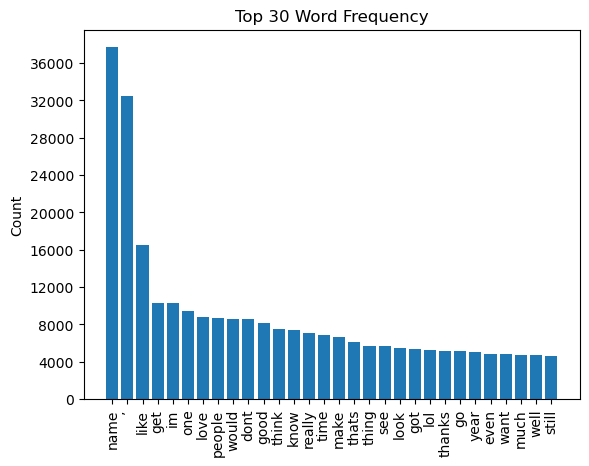

In [34]:
#Visualising the entire dataset

sample_freq_dist = FreqDist(dataemoji_df["tokenized_text"].explode())
most_frequent_words(sample_freq_dist, "Top 30 Word Frequency")

#### Removal of stopwords

In [35]:
# Get the list of stopwords
stopword_list = set(stopwords.words('english'))

# Remove stopwords from the 'tokenized_text' column
dataemoji_df['without_stopwords'] = dataemoji_df['tokenized_text'].apply(lambda tokens: [token for token in tokens if token.lower() not in stopword_list])

# Print the updated DataFrame
print(dataemoji_df.head())

        id                                      original_text  \
0  eew5j0j                                    That game hurt.   
1  ed2mah1     You do right, if you don't care then fuck 'em!   
2  eeibobj                                 Man I love reddit.   
3  eda6yn6  [NAME] was nowhere near them, he was by the Fa...   
4  eespn2i  Right? Considering it’s such an important docu...   

                                                text listed_emotions  \
0                                          game hurt         sadness   
1                            right dont care fuck em         neutral   
2                                    man love reddit            love   
3                           name nowhere near falcon         neutral   
4  right considering ’ important document know da...       gratitude   

   emotion_count    labels  encoded_labels  \
0              1  negative               1   
1              1   neutral               2   
2              1  positive            

#### Stemming with Emojis

In [36]:
#Creating an instance of the PorterStemmer
stemmer = PorterStemmer()

#Function to apply Stemming
def stem_word(word):
  return stemmer.stem(word)

#Applying stemming to the 'without_stopwords' column
dataemoji_df['stemmed_text'] = dataemoji_df['without_stopwords'].apply(lambda x: [stem_word(word) for word in x])

print(dataemoji_df)


             id                                      original_text  \
0       eew5j0j                                    That game hurt.   
1       ed2mah1     You do right, if you don't care then fuck 'em!   
2       eeibobj                                 Man I love reddit.   
3       eda6yn6  [NAME] was nowhere near them, he was by the Fa...   
4       eespn2i  Right? Considering it’s such an important docu...   
...         ...                                                ...   
207809  ed89acy  Well, I'm glad you're out of all that now. How...   
207810  ee6pagw                             Everyone likes [NAME].   
207811  ef28nod  Well when you’ve imported about a gazillion of...   
207812  ee8hse1                                 That looks amazing   
207813  edrhoxh  The FDA has plenty to criticize. But like here...   

                                                     text listed_emotions  \
0                                               game hurt         sadness   
1    

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Split the DataFrame into train and test sets
X = dataemoji_df['stemmed_text']
y = labels_df['encoded_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert the elements to strings
X_train = X_train.astype(str).tolist()
X_test = X_test.astype(str).tolist()
# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectors, y_train)
# Predict labels on the test set
y_pred = classifier.predict(X_test_vectors)
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
# Print the evaluation scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy score:", accuracy)

Precision: 0.488535440505939
Recall: 0.38195860862783904
F1 Score: 0.36960278870904933
Accuracy score: 0.5339845535692803


### Lemmatization with Emojis

In [40]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# Assuming your DataFrame is called 'text_df' and the column to lemmatize is 'without_stopwords'
# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization to a list of words
def apply_lemmatization(word_list):
    lemmatized_text = ' '.join(['[' + lemmatizer.lemmatize(word) + ']' for word in word_list])
    return lemmatized_text

# Create a new column 'lemmatized_column' with the lemmatized text
dataemoji_df['lemmatized_column'] = dataemoji_df['without_stopwords'].apply(apply_lemmatization)

# Print the updated DataFrame
print(dataemoji_df.head())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Elsie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


        id                                      original_text  \
0  eew5j0j                                    That game hurt.   
1  ed2mah1     You do right, if you don't care then fuck 'em!   
2  eeibobj                                 Man I love reddit.   
3  eda6yn6  [NAME] was nowhere near them, he was by the Fa...   
4  eespn2i  Right? Considering it’s such an important docu...   

                                                text listed_emotions  \
0                                          game hurt         sadness   
1                            right dont care fuck em         neutral   
2                                    man love reddit            love   
3                           name nowhere near falcon         neutral   
4  right considering ’ important document know da...       gratitude   

   emotion_count    labels  encoded_labels  \
0              1  negative               1   
1              1   neutral               2   
2              1  positive            

In [41]:
lemmatized_df = dataemoji_df[['lemmatized_column']]
lemmatized_df.head()

,lemmatized_column
0,[game] [hurt]
1,[right] [dont] [care] [fuck] [em]
2,[man] [love] [reddit]
3,[name] [nowhere] [near] [falcon]
4,[right] [considering] [’] [important] [documen...


Analyzing the performance scores for the lemmatized text with emojis

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Split the DataFrame into train and test sets
X = dataemoji_df['lemmatized_column']
y = labels_df['encoded_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectors, y_train)
# Predict labels on the test set
y_pred = classifier.predict(X_test_vectors)
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
Accuracy = accuracy_score(y_test, y_pred)
# Print the evaluation scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy score:", Accuracy)

Precision: 0.49576653831302686
Recall: 0.3868060565801483
F1 Score: 0.37492500760617803
Accuracy score: 0.5393017828356952


#### *Conclusion*